## FULL WORKING CODE — COPY & RUN

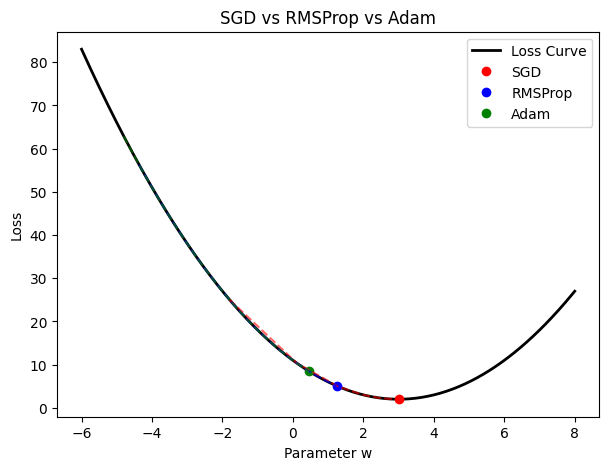

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# -----------------------------
# Create output directory
# -----------------------------
os.makedirs("gifs", exist_ok=True)

# -----------------------------
# Loss function
# -----------------------------
def loss(w):
    return (w - 3)**2 + 2

def grad(w):
    return 2 * (w - 3)

# -----------------------------
# Optimization settings
# -----------------------------
steps = 30
lr = 0.2

# Initial values
w_sgd = -5.0
w_rms = -5.0
w_adam = -5.0

# RMSProp variables
beta = 0.9
v = 0.0

# Adam variables
m, v_adam = 0.0, 0.0
beta1, beta2 = 0.9, 0.999
eps = 1e-8

# History
hist_sgd, hist_rms, hist_adam = [], [], []

# -----------------------------
# Run optimization
# -----------------------------
for t in range(1, steps + 1):
    g1 = grad(w_sgd)
    w_sgd -= lr * g1
    hist_sgd.append(w_sgd)

    g2 = grad(w_rms)
    v = beta * v + (1 - beta) * g2**2
    w_rms -= lr * g2 / (np.sqrt(v) + eps)
    hist_rms.append(w_rms)

    g3 = grad(w_adam)
    m = beta1 * m + (1 - beta1) * g3
    v_adam = beta2 * v_adam + (1 - beta2) * g3**2
    m_hat = m / (1 - beta1**t)
    v_hat = v_adam / (1 - beta2**t)
    w_adam -= lr * m_hat / (np.sqrt(v_hat) + eps)
    hist_adam.append(w_adam)

# -----------------------------
# Plot setup
# -----------------------------
x = np.linspace(-6, 8, 400)
y = loss(x)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, y, color="black", linewidth=2, label="Loss Curve")

p_sgd, = ax.plot([], [], "ro", label="SGD")
p_rms, = ax.plot([], [], "bo", label="RMSProp")
p_adam, = ax.plot([], [], "go", label="Adam")

path_sgd, = ax.plot([], [], "r--", alpha=0.6)
path_rms, = ax.plot([], [], "b--", alpha=0.6)
path_adam, = ax.plot([], [], "g--", alpha=0.6)

ax.set_xlabel("Parameter w")
ax.set_ylabel("Loss")
ax.set_title("SGD vs RMSProp vs Adam")
ax.legend()

# -----------------------------
# Animate + Save
# -----------------------------
writer = PillowWriter(fps=2)

sgd_x, sgd_y = [], []
rms_x, rms_y = [], []
adam_x, adam_y = [], []

with writer.saving(fig, "gifs/optimizer_comparison.gif", dpi=120):
    for i in range(steps):
        # SGD
        w = hist_sgd[i]
        yv = loss(w)
        sgd_x.append(w)
        sgd_y.append(yv)
        p_sgd.set_data([w], [yv])
        path_sgd.set_data(sgd_x, sgd_y)

        # RMSProp
        w = hist_rms[i]
        yv = loss(w)
        rms_x.append(w)
        rms_y.append(yv)
        p_rms.set_data([w], [yv])
        path_rms.set_data(rms_x, rms_y)

        # Adam
        w = hist_adam[i]
        yv = loss(w)
        adam_x.append(w)
        adam_y.append(yv)
        p_adam.set_data([w], [yv])
        path_adam.set_data(adam_x, adam_y)

        writer.grab_frame()

plt.show()
